In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd

# 1. Data Exploration and Preprocessing

In [3]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\DATASCIENCE ASSIGNMENTS\\Alphabets_data.csv")
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
data.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [6]:
data.isnull().sum().sum()

0

In [7]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
x = data.drop('letter', axis=1)  # Features
y = data['letter']  # Target variable

# Normalize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 2.Model Implementation

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#  hidden layers
model.add(Dense(128, input_dim=x_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
# Output layer
model.add(Dense(len(y.unique()), activation='softmax'))

In [11]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from sklearn.model_selection import train_test_split

# Ensure you are splitting the correct variables
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)

print(x_train.shape) 
print(y_train.shape)  

(16000, 16)
(16000,)


In [13]:
# Verify the shapes are consistent
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4546 - loss: 2.0644 - val_accuracy: 0.7788 - val_loss: 0.7650
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7984 - loss: 0.7029 - val_accuracy: 0.8540 - val_loss: 0.5202
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8562 - loss: 0.4859 - val_accuracy: 0.8848 - val_loss: 0.4148
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8866 - loss: 0.3882 - val_accuracy: 0.8963 - val_loss: 0.3479
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9060 - loss: 0.3137 - val_accuracy: 0.9072 - val_loss: 0.3174
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9210 - loss: 0.2698 - val_accuracy: 0.9202 - val_loss: 0.2739
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9301 - loss: 0.2368 - val_accuracy: 0.9230 - val_loss: 0.2509
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9343 - loss: 0.2168 - val_accuracy: 0.

# 3.Hyper parameter Tuning

In [34]:
#  changing the number of neurons in the hidden layer
model = Sequential()
model.add(Dense(256, input_dim=x_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

In [41]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, input_dim=x_scaled.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(y.unique()), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)
param_grid = {'optimizer': ['adam', 'rmsprop']}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# Output the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.937625 using {'optimizer': 'adam'}


In [36]:
# MODEL WITH BEST HYPER PARAMETERS


best_model = Sequential()
#  hidden layers
best_model.add(Dense(256, input_dim=x_scaled.shape[1], activation='relu'))
best_model.add(Dense(128, activation='relu'))
# Output layer
best_model.add(Dense(len(y.unique()), activation='softmax'))

In [37]:
# Compile the best_model
best_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,602 (158.60 KB)

 Trainable params: 40,602 (158.60 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Verify the shapes are consistent
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

# Train the model
best_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5266 - loss: 1.7378 - val_accuracy: 0.8295 - val_loss: 0.6022
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8404 - loss: 0.5464 - val_accuracy: 0.8823 - val_loss: 0.4041
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8896 - loss: 0.3679 - val_accuracy: 0.9082 - val_loss: 0.3137
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9120 - loss: 0.2844 - val_accuracy: 0.9135 - val_loss: 0.2770
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9285 - loss: 0.2268 - val_accuracy: 0.9308 - val_loss: 0.2261
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9435 - loss: 0.1809 - val_accuracy: 0.9298 - val_loss: 0.2179
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9502 - loss: 0.1585 - val_accuracy: 0.9423 - val_loss: 0.1898
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9603 - loss: 0.1305 - val_accuracy: 0.

# 4.Evalution

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Make Predictions
y_pred = best_model.predict(x_test)

# If using softmax activation in the output layer, convert probabilities to class labels
y_pred_classes = y_pred.argmax(axis=1)

# Step 2: Calculate Metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Step 3: Output the Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9603
Precision: 0.9612
Recall: 0.9603
F1 Score: 0.9602


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


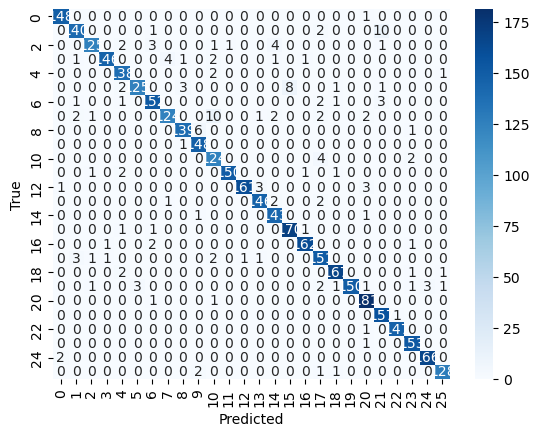

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
# Predict on test data
y_pred = np.argmax(best_model.predict(x_test), axis=-1)
cm = confusion_matrix(y_test, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()